# The dynamics of emotions under online interaction - Results
David Garcia, Arvid Kappas, Dennis Küster, Frank Schweitzer

## 1. Eigendynamics and perception dynamics
### 1.1 Valence dynamics

In [1]:
scale <- 6; shift <- 8;

s1 <-  read.table("Datasets/Study1_emoChanges.dat", header=TRUE)
s2 <-  read.table("Datasets/Study2_emoChanges.dat", header=TRUE)

S <- c(rep(0, length(s1$dt)),rep(1, length(s2$dt)))
h1 <- rep(0, length(s1$dt))
h1[s1$StimType=="Pos"] <- 1
h1[s1$StimType=="Neg"] <- -1
h2 <- rep(0, length(s2$dt))
h2[s2$StimType=="Pos"] <- 1
h2[s2$StimType=="Neg"] <- -1
h <- c(h1,h2)

PostVar1 <-  (s1$PostV - shift)/scale; PreVar1 <- (s1$PreV - shift)/scale;
Dif1 <- 60*(PostVar1-PreVar1)/s1$dt
PostVar2 <-  (s2$PostV - shift)/scale; PreVar2 <- (s2$PreV - shift)/scale;
Dif2 <- 60*(PostVar2-PreVar2)/s2$dt

V <- c(PreVar1,PreVar2)
DV <- c(Dif1,Dif2)

modelValence <- nls(DV ~ -gamma*(V-b)+b0*h+b2*h*V^2+b3*h*V^3, start=list(gamma=1, b=1, b0=1, b2=1, b3=1))  
summary(modelValence)
model <- modelValence


Formula: DV ~ -gamma * (V - b) + b0 * h + b2 * h * V^2 + b3 * h * V^3

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
gamma  0.36655    0.01274  28.773  < 2e-16 ***
b      0.05597    0.02022   2.768  0.00573 ** 
b0     0.14042    0.01108  12.673  < 2e-16 ***
b2     0.05745    0.02299   2.499  0.01258 *  
b3    -0.04676    0.01795  -2.605  0.00929 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2631 on 1266 degrees of freedom

Number of iterations to convergence: 2 
Achieved convergence tolerance: 2.706e-09


In [2]:
library(MASS)
ss <- summary(model)
print(paste("Amplitude:", sd(ss$residuals)))
R2 <- cor(DV,predict(model))^2
print(paste("R2:", R2))

hg <-  hist(ss$residuals, breaks=50, plot=F)
mu.est <-  mean(ss$residuals)
sigma.est <- sd(ss$residuals)
normal.est <- dnorm(hg$mids, mu.est, sigma.est)
meanheight <- mean(hg$density) 
sserr <- sum((hg$density - normal.est)^2)
sstot <- sum((hg$density - meanheight)^2)
r2 <- 1 - sserr / sstot

print(paste("R2 error:", r2))

shapiro.test(ss$residuals)

[1] "Amplitude: 0.262725757062734"
[1] "R2: 0.52082985537134"
[1] "R2 error: 0.85766056317322"



	Shapiro-Wilk normality test

data:  ss$residuals
W = 0.87622, p-value < 2.2e-16


In [3]:
modelValence2 <- nls(DV ~ -(gamma+gammaS*S)*(V-(b+bS*S))+(b0+b0S*S)*h+(b2+b2S*S)*h*V^2+(b3+b3S*S)*h*V^3, 
                     start=list(gamma=1, gammaS=1, b=1, bS=1, b0=1, b0S=1, b2=1, b2S=1, b3=1, b3S=1))

summary(modelValence2)


Formula: DV ~ -(gamma + gammaS * S) * (V - (b + bS * S)) + (b0 + b0S * 
    S) * h + (b2 + b2S * S) * h * V^2 + (b3 + b3S * S) * h * 
    V^3

Parameters:
         Estimate Std. Error t value Pr(>|t|)    
gamma   0.3905140  0.0158020  24.713  < 2e-16 ***
gammaS -0.0643401  0.0266641  -2.413 0.015964 *  
b       0.0555373  0.0224518   2.474 0.013506 *  
bS      0.0005477  0.0478269   0.011 0.990865    
b0      0.1315368  0.0127408  10.324  < 2e-16 ***
b0S     0.0321303  0.0258634   1.242 0.214353    
b2      0.0863481  0.0289435   2.983 0.002906 ** 
b2S    -0.0744587  0.0487189  -1.528 0.126681    
b3     -0.0793340  0.0235650  -3.367 0.000784 ***
b3S     0.0706590  0.0363550   1.944 0.052168 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2624 on 1261 degrees of freedom

Number of iterations to convergence: 2 
Achieved convergence tolerance: 2.417e-07


In [4]:
suppressMessages(library(texreg))
modelPre <- glm(DV ~ V+h+h:(V+I(V^2)+I(V^3)))
modelValenceSimp <- stepAIC(modelPre, direction="both", trace=0)
htmlreg(list(modelPre,modelValenceSimp), custom.coef.names=c("Intercept", "$V$", "$h$", "$hV$", "$hV^2$", "$hV^3$"), bold=0.05, digits=4)

,Model 1,Model 2
Intercept,0.0206**,0.0205**
,(0.0075),(0.0075)
$V$,-0.3666***,-0.3665***
,(0.0127),(0.0127)
$h$,0.1404***,0.1404***
,(0.0111),(0.0111)
$hV$,0.0051,
,(0.0328),
$hV^2$,0.0576*,0.0575*
,(0.0230),(0.0230)


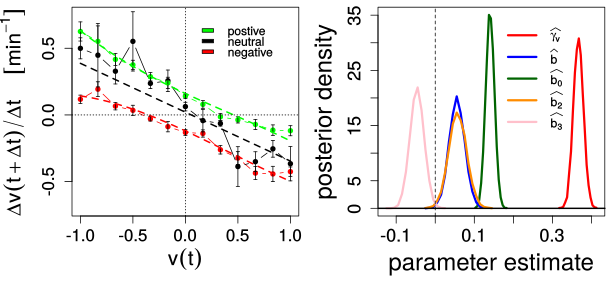

In [5]:
options(repr.plot.width=8.5, repr.plot.height=4)
options(jupyter.plot_mimetypes = 'image/svg+xml')

difLevels <- function(f, PostV, PreV, dt, shift, scale, cuts)
    {
        PostVar <-  (PostV[f] - shift)/scale; PreVar <- (PreV[f] - shift)/scale;
        Dif0 <- 60*(PostVar-PreVar) / dt[f]
        
        df <- data.frame()
        for (cut in cuts)
        {
            Dif <-  Dif0[(PreVar == cut)]
            avgDifV <-  mean(Dif)
            seDifV <-  sd(Dif)/ sqrt(length(Dif))
            df <- rbind(df, data.frame(avgDifV, seDifV))
        }
        return(df)
    }

stats <-  read.table("Datasets/Study12_emoChanges.dat", header=TRUE)
attach(stats)

scale <- 6; shift <- 8;
cuts <-  (seq(2,14)-shift)/scale

type <-  "Neu";
f <-  StimType == type;
VarName <-  "Valence"; vn <-  "v";
dfNeu <- difLevels(f, PostV, PreV, dt, shift, scale, cuts)

type <-  "Neg";
f <-  StimType == type;
dfNeg <- difLevels(f, PostV, PreV, dt, shift, scale, cuts)

type <-  "Pos";
f <-  StimType == type;
dfPos <- difLevels(f, PostV, PreV, dt, shift, scale, cuts)


suppressMessages(require(Hmisc, quietly = T))
par(mfrow=c(1,2))
par(mar=c(5,5,0.5,0.5))
xs <- seq(-1,1,by=0.01)
errbar( cuts, dfNeg$avgDifV, dfNeg$avgDifV-dfNeg$seDifV, dfNeg$avgDifV+dfNeg$seDifV, col="red",
       xlab=expression(v(t)), ylab=expression(Delta *v(t+Delta *t) / Delta *t ~~~~ group("[",min^-1,"]") ), 
       type="b", cex.lab=1.7, cex.axis=1.4, xlim=c(-1,1), ylim=c(-0.7,0.75))
ys <- predict(model, data.frame(V=xs, h=rep(-1, length(xs))))
lines(xs,ys, lwd=2, col="red", lty=2, type="l")

errbar( cuts, dfNeu$avgDifV, dfNeu$avgDifV-dfNeu$seDifV, dfNeu$avgDifV+dfNeu$seDifV, col="black",
       xlab=paste(vn,"(t)",sep=""), ylab=paste("D ",vn, sep=""), type="b", cex.lab=1.5, xlim=c(-1,1), add=TRUE)
ys <- predict(model, data.frame(V=xs, h=rep(0, length(xs))))
lines(xs,ys, lwd=2, col="black", lty=2, type="l")

errbar( cuts, dfPos$avgDifV, dfPos$avgDifV-dfPos$seDifV, dfPos$avgDifV+dfPos$seDifV, col="green",
       xlab=paste(vn,"(t)",sep=""), ylab=paste("D ",vn, sep=""), type="b", cex.lab=1.5, xlim=c(-1,1), add=TRUE)
ys <- predict(model, data.frame(V=xs, h=rep(1, length(xs))))
lines(xs,ys, lwd=2, col="green", lty=2, type="l")

abline(v=0, lty=3)
abline(h=0, lty=3)
legend(x= 0.025, y = 0.7, list("postive", "neutral", "negative"), 
       fill = c("green", "black", "red"), col =  c("green", "black", "red"), box.lwd=-1, y.intersp=1.5)


suppressMessages(library(arm))
Bayesianmodel <-bayesglm(DV ~ V+h+h:(I(V^2)+I(V^3)), prior.df=Inf) 
simulates <- coef(sim(Bayesianmodel, n.sims=20000))
posteriorH <- simulates[10001:20000,3]
posteriorV <- -1*simulates[10001:20000,2]
posteriorB <- simulates[10001:20000,1]/(-1*simulates[10001:20000,2])
posteriorB2 <- simulates[10001:20000,4]
posteriorB3 <- simulates[10001:20000,5]

HHist <- hist(posteriorH, plot=FALSE)
VHist <- hist(posteriorV, plot=FALSE)
BHist <- hist(posteriorB, plot=FALSE)
B2Hist <- hist(posteriorB2, plot=FALSE)
B3Hist <- hist(posteriorB3, plot=FALSE)

xlims <- range(c(HHist$mids,VHist$mids, BHist$mids, B2Hist$mids, B3Hist$mids))
ylims <- range(c(HHist$density, VHist$density, BHist$density, B2Hist$density, B3Hist$density))
plot(VHist$mids, VHist$density, xlim=xlims, ylim=ylims, col="red", type="l", xlab="parameter estimate", ylab="posterior density" , cex.lab=2, cex.axis=1.5, lwd=3)
lines(HHist$mids, HHist$density, col="darkgreen", lwd=3)
lines(BHist$mids, BHist$density, col="blue", lwd=3)
lines(B2Hist$mids, B2Hist$density, col="darkorange", lwd=3)
lines(B3Hist$mids, B3Hist$density, col="pink", lwd=3)
abline(v=0, lty=2)
abline(h=0, lwd=2)

legend(x= 0.15, y = 34, c( expression(widehat(gamma[v])),expression(widehat(b)), expression(widehat(b[0])),
                          expression(widehat(b[2])), expression(widehat(b[3]))), 
       col = c( "red","blue","darkgreen", "darkorange", "pink"), lwd=3, cex=1, box.lwd=-1, y.intersp=3)

### 1.2 Arousal Dynamics

In [6]:
scale <- 3; shift <- 4;

VarName <-  "Arousal"; vn <-  "a";
cuts <-  (seq(1,7)-shift)/scale

type <-  "Neu";
f <-  StimType == type;
dfNeu <- difLevels(f, PostA, PreA, dt, shift, scale, cuts)

type <-  "Neg";
f <-  StimType == type;
dfNeg <- difLevels(f, PostA, PreA, dt, shift, scale, cuts)

type <-  "Pos";
f <-  StimType == type;
dfPos <- difLevels(f, PostA, PreA, dt, shift, scale, cuts)

PostVar1 <-  (s1$PostA - shift)/scale; PreVar1 <- (s1$PreA - shift)/scale;
Dif1 <- 60*(PostVar1-PreVar1)/s1$dt
PostVar2 <-  (s2$PostA - shift)/scale; PreVar2 <- (s2$PreA - shift)/scale;
Dif2 <- 60*(PostVar2-PreVar2)/s2$dt

A <- c(PreVar1,PreVar2)
DA <- c(Dif1,Dif2)

modelArousal <- nls(DA ~ -gamma*(A-d)+d0*abs(h)+d1*abs(h)*A, start=list(gamma=1, d=1, d0=1, d1=1))  
summary(modelArousal)
model <- modelArousal


Formula: DA ~ -gamma * (A - d) + d0 * abs(h) + d1 * abs(h) * A

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
gamma  0.41412    0.04031  10.273  < 2e-16 ***
d     -0.44191    0.06515  -6.783 1.81e-11 ***
d0     0.17783    0.02279   7.802 1.26e-14 ***
d1     0.14469    0.04292   3.371 0.000771 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2562 on 1267 degrees of freedom

Number of iterations to convergence: 2 
Achieved convergence tolerance: 8.824e-09


In [7]:
ss<- summary(model)
print(paste("Amplitude:", sd(ss$residuals)))
R2 <- cor(DA,predict(model))^2
print(paste("R2:", R2))

hg <-  hist(ss$residuals, breaks=50, plot=F)
mu.est <-  mean(ss$residuals)
sigma.est <- sd(ss$residuals)
normal.est <- dnorm(hg$mids, mu.est, sigma.est)
meanheight <- mean(hg$density) 
sserr <- sum((hg$density - normal.est)^2)
sstot <- sum((hg$density - meanheight)^2)
r2 <- 1 - sserr / sstot

print(paste("R2 error:", r2))
  
shapiro.test(ss$residuals)

modelPre <- nls(DA ~ -(gamma+gammaS*S)*(A-(d+dS*S))+(d0+d0S*S)*abs(h)+(d1+d1S*S)*abs(h)*A, start=list(gamma=1,gammaS=1, d=1, dS=1, d0=1, d0S=1, d1=1, d1S=1))  

summary(modelPre)

[1] "Amplitude: 0.255861094517626"
[1] "R2: 0.282861657355946"
[1] "R2 error: 0.784998212387528"



	Shapiro-Wilk normality test

data:  ss$residuals
W = 0.84739, p-value < 2.2e-16



Formula: DA ~ -(gamma + gammaS * S) * (A - (d + dS * S)) + (d0 + d0S * 
    S) * abs(h) + (d1 + d1S * S) * abs(h) * A

Parameters:
       Estimate Std. Error t value Pr(>|t|)    
gamma   0.51001    0.05337   9.556  < 2e-16 ***
gammaS -0.13776    0.08574  -1.607   0.1084    
d      -0.49622    0.06373  -7.787 1.42e-14 ***
dS      0.23947    0.13640   1.756   0.0794 .  
d0      0.23487    0.02945   7.976 3.37e-15 ***
d0S    -0.11076    0.04916  -2.253   0.0244 *  
d1      0.23743    0.05635   4.214 2.69e-05 ***
d1S    -0.14849    0.09137  -1.625   0.1044    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2543 on 1263 degrees of freedom

Number of iterations to convergence: 2 
Achieved convergence tolerance: 6.102e-08


In [8]:
modelPre <- glm(DA ~ A+abs(h)+abs(h):(A+I(A^2)+I(A^3)) )
modelArousalSimp <- stepAIC(modelPre, direction="both", trace=0)
htmlreg(list(modelPre,modelArousalSimp), custom.coef.names=c("Intercept", "$A$", "$|h|$", 
                        "$|h|A$", "$|h|A^2$", "$|h|A^3$"), bold=0.05, digits=4)

,Model 1,Model 2
Intercept,-0.1830***,-0.1830***
,(0.0215),(0.0215)
$A$,-0.4141***,-0.4141***
,(0.0403),(0.0403)
$|h|$,0.1823***,0.1778***
,(0.0237),(0.0228)
$|h|A$,0.1718***,0.1447***
,(0.0516),(0.0429)
$|h|A^2$,-0.0218,
,(0.0247),


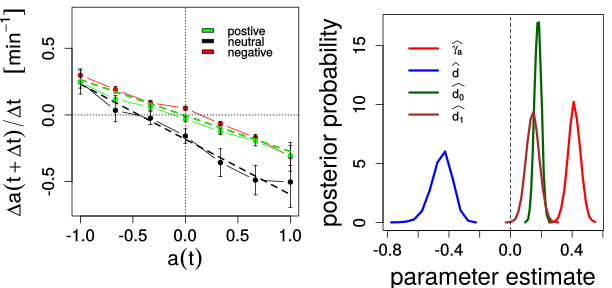

In [9]:
options(repr.plot.width=8.5, repr.plot.height=4)
options(jupyter.plot_mimetypes = 'image/svg+xml')

par(mfrow=c(1,2))
par(mar=c(5,5,0.5,0.5))
xs <- seq(-1,1,by=0.01)
errbar( cuts, dfNeg$avgDifV, dfNeg$avgDifV-dfNeg$seDifV, dfNeg$avgDifV+dfNeg$seDifV, col="red",
       xlab=expression(a(t)), ylab=expression(Delta *a(t+Delta *t) / Delta *t ~~~~ group("[",min^-1,"]") ), 
       type="b", cex.lab=1.7, cex.axis=1.4, xlim=c(-1,1), ylim=c(-0.7,0.75))
ys <- predict(model, data.frame(A=xs, h=rep(-1, length(xs)),S=rep(0, length(xs))))
lines(xs,ys, lwd=2, col="red", lty=2, type="l")

errbar( cuts, dfNeu$avgDifV, dfNeu$avgDifV-dfNeu$seDifV, dfNeu$avgDifV+dfNeu$seDifV, col="black",
       xlab=paste(vn,"(t)",sep=""), ylab=paste("D ",vn, sep=""), type="b", cex.lab=1.5, xlim=c(-1,1), add=TRUE)
ys <- predict(model, data.frame(A=xs, h=rep(0, length(xs)),S=rep(0, length(xs))))
lines(xs,ys, lwd=2, col="black", lty=2, type="l")

errbar( cuts, dfPos$avgDifV, dfPos$avgDifV-dfPos$seDifV, dfPos$avgDifV+dfPos$seDifV, col="green",
       xlab=paste(vn,"(t)",sep=""), ylab=paste("D ",vn, sep=""), type="b", cex.lab=1.5, xlim=c(-1,1), add=TRUE)
ys <- predict(model, data.frame(A=xs, h=rep(1, length(xs)),S=rep(0, length(xs))))
lines(xs,ys, lwd=2, col="green", lty=2, type="l")

abline(v=0, lty=3)
abline(h=0, lty=3)
legend(x= 0.025, y = 0.7, list("postive", "neutral", "negative"), 
       fill = c("green", "black", "red"), col =  c("green", "black", "red"), box.lwd=-1, y.intersp=1.5)


Bayesianmodel <-bayesglm(DA ~ abs(h) + A + abs(h):A, prior.df=Inf) 
simulates <- coef(sim(Bayesianmodel, n.sims=20000))

posteriorD <- simulates[10001:20000,1]/(-1*simulates[10001:20000,3])
posteriorG <- -1*simulates[10001:20000,3]
posteriorD0 <- simulates[10001:20000,2]
posteriorD1 <- simulates[10001:20000,4]

DHist <- hist(posteriorD, plot=FALSE)
GHist <- hist(posteriorG, plot=FALSE)
D0Hist <- hist(posteriorD0, plot=FALSE)
D1Hist <- hist(posteriorD1, plot=FALSE)

xlims <- range(c(DHist$mids,GHist$mids,D0Hist$mids,D1Hist$mids))
ylims <- range(c(DHist$density,GHist$density,D0Hist$density,D1Hist$density))
par(mar=c(4,5.35,1,0.6))
plot(GHist$mids, GHist$density, xlim=xlims, ylim=ylims, col="red", type="l", xlab="parameter estimate", 
     ylab="posterior probability", cex.lab=2, cex.axis=1.4, lwd=3)
lines(DHist$mids, DHist$density, col="blue", lwd=3)
lines(D0Hist$mids, D0Hist$density, col="darkgreen", lwd=3)
lines(D1Hist$mids, D1Hist$density, col="brown", lwd=3)
abline(v=0, lty=2)
legend(x= -0.75, y = 16, c(expression(widehat(gamma[a])), expression(widehat(d)), expression(widehat(d[0])), 
                          expression(widehat(d[1]))), col = c("red", "blue", "darkgreen", "brown"), 
                          lwd=3, cex=1, box.lwd=-1,y.intersp=3)

## 2. Expression Dynamics
### 2.1 Production Rules

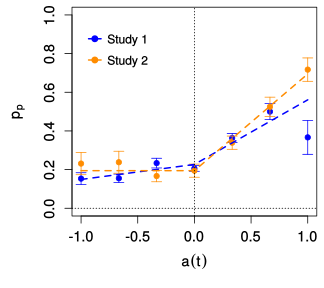

In [10]:
options(repr.plot.width=4.5, repr.plot.height=4)
options(jupyter.plot_mimetypes = 'image/svg+xml')

s1 <- read.table("Datasets/Study1_reports.txt", header=TRUE)
s2 <- read.table("Datasets/Study2_reports.dat", header=TRUE)
as <- seq(1,7)
mnpart <- NULL; mnpart2 <- NULL;  
sdpart <- NULL; sdpart2 <- NULL;
s1$Part<- (s1$Part-1)/6
for (a in as)
  {
    mnpart[a] <- mean(s1$Part[s1$PostA==a])
    sdpart[a] <- sd(s1$Part[s1$PostA==a])/sqrt(sum(s1$PostA==a))
    mnpart2[a] <- mean(s2$Part[s2$PostA==a])
    sdpart2[a] <- sd(s2$Part[s2$PostA==a])/sqrt(sum(s2$PostA==a))
  }
scale <- 3; shift <- 4;
ras <- (as-shift)/scale
suppressMessages(library(plotrix))
par(mar=c(5,5,0.5,0.5))
plotCI(ras, mnpart, sdpart, sdpart, col="blue", gap=0, pch=19, xlab=expression(a(t)), ylab=expression(p[p]), ylim=c(0,1), cex.lab=1.2, cex.axis=1.2)
plotCI(ras, mnpart2, sdpart2, sdpart2, col="darkorange", gap=0, pch=19, add=TRUE)
suppressMessages(library(earth))

A <- (s1$PostA-shift)/scale
P <- s1$Part
mars1 <- earth(P~A, nk=3)

Ar <- rank(A)
Pr <- rank(P)
mars1r <- earth(Pr~Ar, nk=3)

pall <- P
aall <- A
A <- (s2$PostA-shift)/scale
P <- s2$Part
pall <- c(pall, P)
aall <- c(aall, P)
mars2 <- earth(P~A, nk=3)
Ar <- rank(A)
Pr <- rank(P)

as <- seq(-1,1,by=0.01)
p1 <- predict(mars1, data.frame(A=as))
p2 <- predict(mars2, data.frame(A=as))

lines(as, p1, lty=2, lwd=2, col="blue")
lines(as, p2, lty=2, lwd=2, col="darkorange")
legend(-0.95,0.95, c("Study 1", "Study 2"), col=c("blue", "darkorange"), pch=19, lwd=2, box.lwd=-1, y.intersp = 3)
abline(lty=3, v=0)
abline(lty=3, h=0)

In [11]:
A <- (s1$PostA-shift)/scale
P <- s1$Part
S <- rep(0,length(A)) 
A <- c(A,(s2$PostA-shift)/scale)
P <- c(P,s2$Part)
S <- c(S, rep(1,length(A)-length(S))) 

marsall <- earth(P~A, nk=3)
summary(marsall)

lin <- lm(P[A>=0] ~ A[A>=0])
summary(lin)

lin <- earth(P~S*A, degree=2)
summary(lin)

summary(mars1)
summary(mars2)

Call: earth(formula=P~A, nk=3)

            coefficients
(Intercept)    0.1987773
h(A-0)         0.4383706

Selected 2 of 3 terms, and 1 of 1 predictors
Termination condition: Reached nk 3
Importance: A
Number of terms at each degree of interaction: 1 1 (additive model)
GCV 0.0880595    RSS 112.2765    GRSq 0.1424228    RSq 0.1451006


Call:
lm(formula = P[A >= 0] ~ A[A >= 0])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63065 -0.20900 -0.04233  0.29100  0.79100 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.20900    0.01452   14.39   <2e-16 ***
A[A >= 0]    0.42165    0.03524   11.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3084 on 824 degrees of freedom
Multiple R-squared:  0.148,	Adjusted R-squared:  0.147 
F-statistic: 143.1 on 1 and 824 DF,  p-value: < 2.2e-16


Call: earth(formula=P~S*A, degree=2)

                         coefficients
(Intercept)                 0.1955314
h(A-0)                      0.4766772
h(A-0.666667)              -0.9166260
h(A-0) * h(S:A-0.666667)    1.0515151

Selected 4 of 8 terms, and 2 of 3 predictors
Termination condition: RSq changed by less than 0.001 at 8 terms
Importance: A, S:A, S-unused
Number of terms at each degree of interaction: 1 2 1
GCV 0.08742085    RSS 110.5049    GRSq 0.1486424    RSq 0.15859

Call: earth(formula=P~A, nk=3)

            coefficients
(Intercept)   0.22666866
h(0-A)       -0.07760381
h(A-0)        0.33418392

Selected 3 of 3 terms, and 1 of 1 predictors
Termination condition: Reached nk 3
Importance: A
Number of terms at each degree of interaction: 1 2 (additive model)
GCV 0.08237434    RSS 74.13917    GRSq 0.09110995    RSq 0.09909138

Call: earth(formula=P~A, nk=3)

            coefficients
(Intercept)    0.1944473
h(A-0)         0.5002638

Selected 2 of 3 terms, and 1 of 1 predictors
Termination condition: Reached nk 3
Importance: A
Number of terms at each degree of interaction: 1 1 (additive model)
GCV 0.1017922    RSS 37.15663    GRSq 0.2096604    RSq 0.2181815

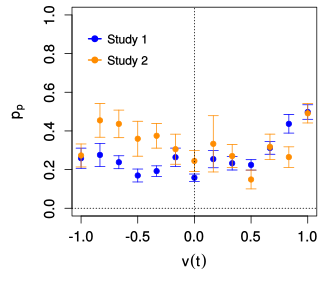

In [12]:

as <- sort(unique(s1$PostV))
mnpart <- NULL; mnpart2 <- NULL;  
sdpart <- NULL; sdpart2 <- NULL;
#s1$Part<- (s1$Part-1)/6
#s2$Part<- (s2$Part-1)/6
for (a in as)
  {
    mnpart[a+7] <- mean(s1$Part[s1$PostV==a])
    sdpart[a+7] <- sd(s1$Part[s1$PostV==a])/sqrt(sum(s1$PostV==a))
    mnpart2[a+7] <- mean(s2$Part[s2$PostV==a])
    sdpart2[a+7] <- sd(s2$Part[s2$PostV==a])/sqrt(sum(s2$PostV==a))
  }
scale <- 6; shift <- 0;
ras <- (as-shift)/scale
par(mar=c(5,5,0.5,0.5))
plotCI(ras, mnpart, sdpart, sdpart, col="blue", gap=0, pch=19, xlab=expression(v(t)), ylab=expression(p[p]), ylim=c(0,1), cex.lab=1.2, cex.axis=1.2)
plotCI(ras, mnpart2, sdpart2, sdpart2, col="darkorange", gap=0, pch=19, add=TRUE)
library(earth)

V <- (s1$PostV-shift)/scale
P <- s1$Part
mars1 <- earth(P~V, nk=3)
V <- (s2$PostV-shift)/scale
P <- s2$Part
mars2 <- earth(P~V, nk=3)

legend(-0.95,0.95, c("Study 1", "Study 2"), col=c("blue", "darkorange"), pch=19, lwd=2, box.lwd=-1, y.intersp = 3)
abline(lty=3, v=0)
abline(lty=3, h=0)


In [13]:
summary(mars1)
summary(mars2)

V <- (s1$PostV-shift)/scale
P <- s1$Part
S <- rep(0,length(V)) 
V <- c(V,(s2$PostV-shift)/scale)
P <- c(P,s2$Part)

marsall <- earth(P~V, nk=3)
summary(marsall)

V <- (s1$PostV-shift)/scale
V <- c(V,(s2$PostV-shift)/scale)
A <- (s1$PostA-4)/3
A <- c(A,(s2$PostA-4)/3)

marsall <- earth(P~V+A)
summary(marsall)

S <- c(S, rep(1,length(V)-length(S))) 
lin <- lm(P~S*V)
htmlreg(lin, custom.model.names=c("Study 1 and 2"), 
        caption="Linear regression for participation depending on positive valence", digits=4, bold=0.05)


Call: earth(formula=P~V, nk=3)

              coefficients
(Intercept)      0.2024686
h(V-0.333333)    0.4193627

Selected 2 of 3 terms, and 1 of 1 predictors
Termination condition: Reached nk 3
Importance: V
Number of terms at each degree of interaction: 1 1 (additive model)
GCV 0.08273247    RSS 74.79097    GRSq 0.08715848    RSq 0.09117097

Call: earth(formula=P~V, nk=3)

              coefficients
(Intercept)     0.23438376
h(0.833333-V)   0.07425466
h(V-0.833333)   1.54106586

Selected 3 of 3 terms, and 1 of 1 predictors
Termination condition: Reached nk 3
Importance: V
Number of terms at each degree of interaction: 1 2 (additive model)
GCV 0.1251494    RSS 45.18735    GRSq 0.02830999    RSq 0.04920593

Call: earth(formula=P~V, nk=3)

            coefficients
(Intercept)   0.19751669
h(0.5-V)      0.05558298
h(V-0.5)      0.58316381

Selected 3 of 3 terms, and 1 of 1 predictors
Termination condition: Reached nk 3
Importance: V
Number of terms at each degree of interaction: 1 2 (additive model)
GCV 0.09598681    RSS 122.0011    GRSq 0.06522183    RSq 0.07105507

Call: earth(formula=P~V+A)

            coefficients
(Intercept)   0.20164907
h(V-0.5)      0.35953786
h(0-A)       -0.07736198
h(A-0)        0.34478645

Selected 4 of 5 terms, and 2 of 2 predictors
Termination condition: RSq changed by less than 0.001 at 5 terms
Importance: A, V
Number of terms at each degree of interaction: 1 3 (additive model)
GCV 0.08516065    RSS 107.9018    GRSq 0.1706536    RSq 0.1784105

,Study 1 and 2
(Intercept),0.2500***
,(0.0105)
S,0.0803***
,(0.0195)
V,0.1068***
,(0.0182)
S:V,-0.0972**
,(0.0304)
R2,0.0375
Adj. R2,0.0353


In [14]:
V <- (s1$PostV-shift)/scale
P <- s1$Part
S <- rep(0,length(V)) 
V <- c(V,(s2$PostV-shift)/scale)
P <- c(P,s2$Part)
S <- c(S, rep(1,length(V)-length(S))) 

lin <- earth(P~S*V, degree=2)
summary(lin)

Call: earth(formula=P~S*V, degree=2)

                            coefficients
(Intercept)                    0.2071435
h(V-0.5)                       0.5595923
S * h(0.5-V)                   0.1853421
h(0.5-V) * h(-0.666667-S:V)   -0.3782101

Selected 4 of 13 terms, and 3 of 3 predictors
Termination condition: RSq changed by less than 0.001 at 13 terms
Importance: V, S, S:V
Number of terms at each degree of interaction: 1 1 2
GCV 0.09448477    RSS 119.4341    GRSq 0.07984963    RSq 0.09060105

### 2.2 Feedback of expression

Warning message:
In read.spss("Datasets/Study3.sav"): Datasets/Study3.sav: Unrecognized record type 7, subtype 18 encountered in system fileWarning message:
In read.spss("Datasets/Study3.sav"): Datasets/Study3.sav: Unrecognized record type 7, subtype 22 encountered in system filere-encoding from CP1252
Warning message:
In is.na(x): is.na() applied to non-(list or vector) of type 'expression'Warning message:
In is.na(x): is.na() applied to non-(list or vector) of type 'expression'

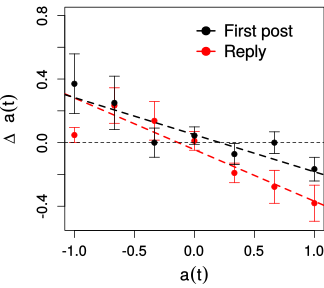

In [15]:
suppressMessages(library(foreign))
stats <-  read.spss("Datasets/Study3.sav")
attach(stats)
suppressMessages(library(gplots))
# first post
preValenceF <- c(fpposthink_valence, fpnegthink_valence)
postValenceF <- c(fpposwrite_valence, fpnegwrite_valence)

valDifF <- (postValenceF-8)/6 - (preValenceF-8)/6

meanValDifF <- NULL;
seValDifF <- NULL;
for (preV in seq(1,7))
  {
    sel <-  preValenceF >= 2*preV & preValenceF <= 2*preV+1;
    meanValDifF[preV] <-  mean(valDifF[sel])
    seValDifF[preV] <-  sd(valDifF[sel])/sqrt(sum(sel))
  }

preArousalF <- c(fpposthinkq3, fpnegthinkq3)
postArousalF <- c(fpposwriteq3, fpnegwriteq3)

aroDifF <- (postArousalF-4)/3  - (preArousalF-4)/3 

meanAroDifF <- NULL;
seAroDifF <- NULL;
for (preA in seq(1,7))
  {
    meanAroDifF[preA] <-  mean(aroDifF[preArousalF == preA])
    seAroDifF[preA] <-  sd(aroDifF[preArousalF == preA])/sqrt(sum(preArousalF == preA))
  }

############ REPLY STATS

aloneValence <- c(sppost01alone_valence , sppost02alone_valence , sppost05alone_valence , sppost06alone_valence , sppost08alone_valence
                  , sppost09alone_valence , sppost12alone_valence , sppost15alone_valence , sppost18alone_valence , sppost20alone_valence)
aloneArousal <- c(sppost01aloneq3 , sppost02aloneq3 , sppost05aloneq3 , sppost06aloneq3 , sppost08aloneq3 ,
                  sppost09aloneq3 , sppost12aloneq3 , sppost15aloneq3 , sppost18aloneq3 , sppost20aloneq3)

replyValence <- c(sppost01reply_valence, sppost02reply_valence , sppost05reply_valence , sppost06reply_valence , sppost08reply_valence ,
                  sppost09reply_valence , sppost12reply_valence , sppost15reply_valence , sppost18reply_valence , sppost20reply_valence)
replyArousal <- c(sppost01replyq3 , sppost02replyq3 , sppost05replyq3 , sppost06replyq3 , sppost08replyq3 ,
                  sppost09replyq3 , sppost12replyq3, sppost15replyq3 , sppost18replyq3 , sppost20replyq3)

preArousal <- aloneArousal[!is.na(aloneArousal) & (aloneArousal < 99)];
preValence <- aloneValence[!is.na(aloneValence) & (aloneValence < 99)];

postArousal <- replyArousal[!is.na(replyArousal) & (replyArousal < 99)];
postValence <- replyValence[!is.na(replyValence) & (replyValence < 99)];

aroDif <- (postArousal-4)/3  - (preArousal-4)/3 

meanAroDif <- NULL;
seAroDif <- NULL;
for (preA in seq(1,7))
  {
    meanAroDif[preA] <-  mean(aroDif[preArousal == preA])
    seAroDif[preA] <-  sd(aroDif[preArousal == preA])/sqrt(sum(preArousal == preA))
  }

DA <- aroDif
A <- (preArousal-4)/3
lin <- lm(DA~A)

par(mar=c(4,4.5,0.5,0))
plotCI((seq(1,7)-4)/3, meanAroDif,  seAroDif,  seAroDif, type="p", col="red",
       ylim=c(-0.5, 0.8), xlab=expression(a(t)), ylab=expression(Delta~~a(t)), gap=0, pch=19, cex.lab=1.4, cex.axis=1.2)
abline(lin$coefficients[1], lin$coefficients[2], lty=2, col="red", lwd=2)
abline(h=0, lty=2)
DA <- aroDifF
A <- (preArousalF-4)/3
linF <- lm(DA~A)

plotCI((seq(1,7)-4)/3, meanAroDifF,  seAroDifF, seAroDifF, type="p", add=TRUE, gap=0, pch=19)
abline(linF$coefficients[1], linF$coefficients[2], lty=2, col="black", lwd=2)


DA <- c(aroDif,aroDifF)
A <- c((preArousal-4)/3, (preArousalF-4)/3)
S <- c(rep(0, length(aroDif)), rep(1, length(aroDifF)))
linA <- lm(DA~A*S)
legend(0,0.8,c("First post", "Reply"), col=c("black", "red"), pch=19, lwd=2, cex=1.4, box.lwd=-1, y.intersp = 2)


In [16]:
htmlreg(list(lin, linF, linA), custom.model.names=c("Reply", "First Post", "Interaction"), bold=0.05, digits=4)


,Reply,First Post,Interaction
(Intercept),-0.0438,0.0501,-0.0438
,(0.0355),(0.0358),(0.0360)
A,-0.3247***,-0.2334***,-0.3247***
,(0.0685),(0.0657),(0.0695)
S,,,0.0938
,,,(0.0504)
A:S,,,0.0914
,,,(0.0950)
R2,0.1494,0.0897,0.1358
Adj. R2,0.1428,0.0825,0.1257


Warning message:
In is.na(x): is.na() applied to non-(list or vector) of type 'expression'Warning message:
In is.na(x): is.na() applied to non-(list or vector) of type 'expression'

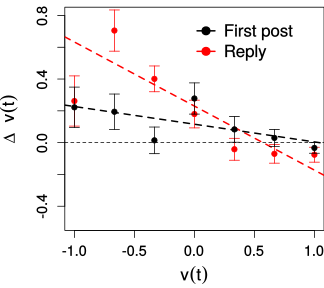

In [17]:

valDif <- (postValence-8)/6 - (preValence-8)/6

meanValDif <- NULL;
seValDif <- NULL;
for (preV in seq(1,7))
  {
    sel <-  preValence >= 2*preV & preValence <= 2*preV+1;
    meanValDif[preV] <-  mean(valDif[sel])
    seValDif[preV] <-  sd(valDif[sel])/sqrt(sum(sel))
  }

DV <- valDif
V <- (preValence-8)/6
linV <- lm(DV~V)
par(mar=c(4,4.5,0.5,0))

plotCI((seq(1,7)-4)/3, meanValDif,  seValDif,  seValDif, type="p", col="red",
       xlab=expression(v(t)), ylab=expression(Delta~~v(t)), gap=0, pch=19, ylim=c(-0.5,0.8), cex.lab=1.4, cex.axis=1.2)
abline(linV$coefficients[1], linV$coefficients[2], lty=2, col="red", lwd=2)
abline(h=0, lty=2)
DV <- valDifF
V <- (preValenceF-8)/6
linVF <- lm(DV~V)
plotCI((seq(1,7)-4)/3, meanValDifF, seValDifF, seValDifF, type="p", add=TRUE, gap=0, pch=19)
abline(linVF$coefficients[1], linVF$coefficients[2], lty=2, col="black", lwd=2)

DV <- c(valDif,valDifF)
V <- c((preValence-8)/6, (preValenceF-8)/6)
S <- c(rep(0, length(valDif)), rep(1, length(valDifF)))
linVS <- lm(DV~V*S)
legend(0,0.8,c("First post", "Reply"), col=c("black", "red"), pch=19, lwd=2, cex=1.4, box.lwd=-1, y.intersp = 2)

In [18]:
htmlreg(list(linV, linVF, linVS), custom.model.names=c("Reply", "First Post", "Interaction"), digits=4, bold=0.05)

,Reply,First Post,Interaction
(Intercept),0.2301***,0.1160***,0.2301***
,(0.0361),(0.0337),(0.0351)
V,-0.4030***,-0.1113,-0.4030***
,(0.0671),(0.0572),(0.0653)
S,,,-0.1142*
,,,(0.0494)
V:S,,,0.2917**
,,,(0.0879)
R2,0.2198,0.0288,0.1469
Adj. R2,0.2137,0.0212,0.1369


### 2.3 Expression Function

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<table cellspacing="0" align="center" style="border: none;">
<caption align="bottom" style="margin-top:0.3em;">Logistic regression for positive and negative expression depending on valence</caption>
<tr>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"></th>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"><b>P(pos)</b></th>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"><b>P(neg)</b></th>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">(Intercept)</td>
<td style="padding-right: 12px; border: none;"><b>-0.4203</b><sup style="vertical-align: 0px;">*</sup></td>
<td style="padding-right: 12px; border: none;">0.2194</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;"></td>
<td style="padding-right: 12px; border: none;">(0.1815)</td>
<td style="padding-right: 12px; border: none;">(0.1774)</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">v</td>
<td style="padding-right: 12px; border: none;"><b>0.9462</b><sup style="vertical-align: 0px;">**</sup></td>
<td style="padding-right: 12px; border: none;"><b>-0.9777</b><sup style="vertical-align: 0px;">**</sup></td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;"></td>
<td style="padding-right: 12px; border: none;">(0.3006)</td>
<td style="padding-right: 12px; border: none;">(0.2976)</td>
</tr>
<tr>
<td style="border-top: 1px solid black;">AIC</td>
<td style="border-top: 1px solid black;">244.7359</td>
<td style="border-top: 1px solid black;">244.4034</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">BIC</td>
<td style="padding-right: 12px; border: none;">251.1439</td>
<td style="padding-right: 12px; border: none;">250.8114</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">Log Likelihood</td>
<td style="padding-right: 12px; border: none;">-120.3680</td>
<td style="padding-right: 12px; border: none;">-120.2017</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">Deviance</td>
<td style="padding-right: 12px; border: none;">240.7359</td>
<td style="padding-right: 12px; border: none;">240.4034</td>
</tr>
<tr>
<td style="border-bottom: 2px solid black;">Num. obs.</td>
<td style="border-bottom: 2px solid black;">182</td>
<td style="border-bottom: 2px solid black;">182</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;" colspan="3"><span style="font-size:0.8em"><sup style="vertical-align: 0px;">***</sup>p &lt; 0.001, <sup style="vertical-align: 0px;">**</sup>p &lt; 0.01, <sup style="vertical-align: 0px;">*</sup>p &lt; 0.05</span></td>
</tr>
</table>

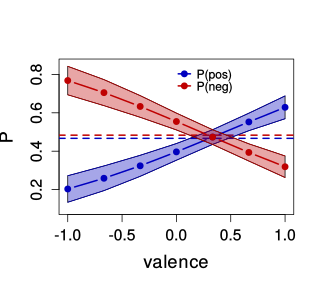

In [19]:
load(file="Datasets/Study3_Text_AllSentiment.RData")
attach(data)
ispos <- Positive > 2
isneg <- Negative < -2

v <- (valence - 4)/3
a <- (arousal - 4)/3
vals <- (seq(1,7)-4)/3

linp <- glm(ispos~v, family="binomial")
linn <- glm(isneg~v, family="binomial")

predisp <- predict(linp, newdata=data.frame(v=vals), type="response", se.fit=TRUE)
predisn <- predict(linn, newdata=data.frame(v=vals), type="response", se.fit=TRUE)

plot(vals, predisp$fit, ylim=c(0.1,0.85), type="l", col="darkgreen", lwd=0.01,
     xlab=expression(valence), ylab=expression(P), cex.axis=1.3, cex.lab=1.5)
abline(h=sum(ispos)/length(ispos), lwd=2, lty=2, col=rgb(0,0,0.75,1))
abline(h=sum(isneg)/length(isneg), lwd=2, lty=2, col=rgb(0.75,0,0,1))

polygon(c(vals,rev(vals)), c(predisp$fit-predisp$se, rev(predisp$fit+predisp$se)), col=rgb(0,0,0.75,0.35))
lines(vals, predisp$fit-predisp$se, col=rgb(0,0,0.75,1))
lines(vals, predisp$fit+predisp$se, col=rgb(0,0,0.75,1))
lines(vals, predisp$fit, col=rgb(0,0,0.75,1), type="b", lwd=2, pch=19)

polygon(c(vals,rev(vals)), c(predisn$fit-predisn$se, rev(predisn$fit+predisn$se)), col=rgb(0.75,0,0,0.35))
lines(vals, predisn$fit-predisn$se, col=rgb(0.75,0,0,1))
lines(vals, predisn$fit+predisn$se, col=rgb(0.75,0,0,1))
lines(vals, predisn$fit, col=rgb(0.75,0,0,1), type="b", lwd=2, pch=19)

legend(0,0.85,c("P(pos)", "P(neg)"), col=c(rgb(0,0,0.75,1), rgb(0.75,0,0,1)), pch=19, lwd=2, cex=1, box.lwd=-1, y.intersp = 2)

htmlreg(list(linp, linn), caption="Logistic regression for positive and negative expression depending on valence", 
        digits=4, bold=0.05, custom.model.names=c("P(pos)", "P(neg)"))


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<table cellspacing="0" align="center" style="border: none;">
<caption align="bottom" style="margin-top:0.3em;">Logistic regression for positive and negative expression depending on arousal</caption>
<tr>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"></th>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"><b>P(pos)</b></th>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"><b>P(neg)</b></th>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">(Intercept)</td>
<td style="padding-right: 12px; border: none;">-0.1110</td>
<td style="padding-right: 12px; border: none;">-0.0865</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;"></td>
<td style="padding-right: 12px; border: none;">(0.1502)</td>
<td style="padding-right: 12px; border: none;">(0.1502)</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">a</td>
<td style="padding-right: 12px; border: none;">-0.2990</td>
<td style="padding-right: 12px; border: none;">0.2743</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;"></td>
<td style="padding-right: 12px; border: none;">(0.2672)</td>
<td style="padding-right: 12px; border: none;">(0.2670)</td>
</tr>
<tr>
<td style="border-top: 1px solid black;">AIC</td>
<td style="border-top: 1px solid black;">254.2527</td>
<td style="border-top: 1px solid black;">255.0442</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">BIC</td>
<td style="padding-right: 12px; border: none;">260.6607</td>
<td style="padding-right: 12px; border: none;">261.4522</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">Log Likelihood</td>
<td style="padding-right: 12px; border: none;">-125.1264</td>
<td style="padding-right: 12px; border: none;">-125.5221</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">Deviance</td>
<td style="padding-right: 12px; border: none;">250.2527</td>
<td style="padding-right: 12px; border: none;">251.0442</td>
</tr>
<tr>
<td style="border-bottom: 2px solid black;">Num. obs.</td>
<td style="border-bottom: 2px solid black;">182</td>
<td style="border-bottom: 2px solid black;">182</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;" colspan="3"><span style="font-size:0.8em"><sup style="vertical-align: 0px;">***</sup>p &lt; 0.001, <sup style="vertical-align: 0px;">**</sup>p &lt; 0.01, <sup style="vertical-align: 0px;">*</sup>p &lt; 0.05</span></td>
</tr>
</table>

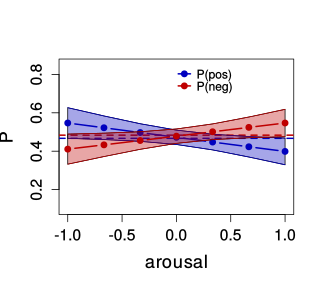

In [20]:
ispos <- Positive > 2
isneg <- Negative < -2

v <- (valence - 4)/3
a <- (arousal - 4)/3
vals <- (seq(1,7)-4)/3

linp <- glm(ispos~a, family="binomial")
linn <- glm(isneg~a, family="binomial")

predisp <- predict(linp, newdata=data.frame(a=vals), type="response", se.fit=TRUE)
predisn <- predict(linn, newdata=data.frame(a=vals), type="response", se.fit=TRUE)

plot(vals, predisp$fit, ylim=c(0.1,0.85), type="l", col="darkgreen", lwd=0.01,
     xlab=expression(arousal), ylab=expression(P), cex.axis=1.3, cex.lab=1.5)
abline(h=sum(ispos)/length(ispos), lwd=2, lty=2, col=rgb(0,0,0.75,1))
abline(h=sum(isneg)/length(isneg), lwd=2, lty=2, col=rgb(0.75,0,0,1))

polygon(c(vals,rev(vals)), c(predisp$fit-predisp$se, rev(predisp$fit+predisp$se)), col=rgb(0,0,0.75,0.35))
lines(vals, predisp$fit-predisp$se, col=rgb(0,0,0.75,1))
lines(vals, predisp$fit+predisp$se, col=rgb(0,0,0.75,1))
lines(vals, predisp$fit, col=rgb(0,0,0.75,1), type="b", lwd=2, pch=19)

polygon(c(vals,rev(vals)), c(predisn$fit-predisn$se, rev(predisn$fit+predisn$se)), col=rgb(0.75,0,0,0.35))
lines(vals, predisn$fit-predisn$se, col=rgb(0.75,0,0,1))
lines(vals, predisn$fit+predisn$se, col=rgb(0.75,0,0,1))
lines(vals, predisn$fit, col=rgb(0.75,0,0,1), type="b", lwd=2, pch=19)

legend(0,0.85,c("P(pos)", "P(neg)"), col=c(rgb(0,0,0.75,1), rgb(0.75,0,0,1)), pch=19, lwd=2, cex=1, box.lwd=-1,y.intersp = 2)

htmlreg(list(linp, linn), caption="Logistic regression for positive and negative expression depending on arousal", 
        digits=4, bold=0.05, custom.model.names=c("P(pos)", "P(neg)"))

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<table cellspacing="0" align="center" style="border: none;">
<caption align="bottom" style="margin-top:0.3em;">Logistic regression for positive and negative expression depending on valence (QDAP)</caption>
<tr>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"></th>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"><b>P(pos)</b></th>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"><b>P(neg)</b></th>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">(Intercept)</td>
<td style="padding-right: 12px; border: none;">-0.1596</td>
<td style="padding-right: 12px; border: none;">0.0341</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;"></td>
<td style="padding-right: 12px; border: none;">(0.1780)</td>
<td style="padding-right: 12px; border: none;">(0.1721)</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">v</td>
<td style="padding-right: 12px; border: none;"><b>1.0960</b><sup style="vertical-align: 0px;">***</sup></td>
<td style="padding-right: 12px; border: none;"><b>-0.7402</b><sup style="vertical-align: 0px;">**</sup></td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;"></td>
<td style="padding-right: 12px; border: none;">(0.3021)</td>
<td style="padding-right: 12px; border: none;">(0.2868)</td>
</tr>
<tr>
<td style="border-top: 1px solid black;">AIC</td>
<td style="border-top: 1px solid black;">240.7387</td>
<td style="border-top: 1px solid black;">247.9446</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">BIC</td>
<td style="padding-right: 12px; border: none;">247.1467</td>
<td style="padding-right: 12px; border: none;">254.3526</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">Log Likelihood</td>
<td style="padding-right: 12px; border: none;">-118.3693</td>
<td style="padding-right: 12px; border: none;">-121.9723</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">Deviance</td>
<td style="padding-right: 12px; border: none;">236.7387</td>
<td style="padding-right: 12px; border: none;">243.9446</td>
</tr>
<tr>
<td style="border-bottom: 2px solid black;">Num. obs.</td>
<td style="border-bottom: 2px solid black;">182</td>
<td style="border-bottom: 2px solid black;">182</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;" colspan="3"><span style="font-size:0.8em"><sup style="vertical-align: 0px;">***</sup>p &lt; 0.001, <sup style="vertical-align: 0px;">**</sup>p &lt; 0.01, <sup style="vertical-align: 0px;">*</sup>p &lt; 0.05</span></td>
</tr>
</table>

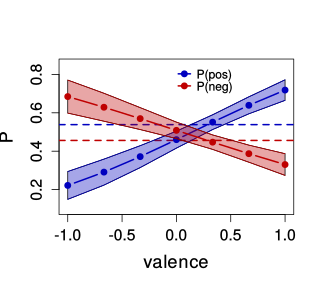

In [21]:
ispos <- qdpmax > 0.25
isneg <- qdpmin < -0.25

v <- (valence - 4)/3
a <- (arousal - 4)/3
vals <- (seq(1,7)-4)/3

linp <- glm(ispos~v, family="binomial")
linn <- glm(isneg~v, family="binomial")

predisp <- predict(linp, newdata=data.frame(v=vals), type="response", se.fit=TRUE)
predisn <- predict(linn, newdata=data.frame(v=vals), type="response", se.fit=TRUE)

plot(vals, predisp$fit, ylim=c(0.1,0.85), type="l", col="darkgreen", lwd=0.01,
     xlab=expression(valence), ylab=expression(P), cex.axis=1.3, cex.lab=1.5)
abline(h=sum(ispos)/length(ispos), lwd=2, lty=2, col=rgb(0,0,0.75,1))
abline(h=sum(isneg)/length(isneg), lwd=2, lty=2, col=rgb(0.75,0,0,1))

polygon(c(vals,rev(vals)), c(predisp$fit-predisp$se, rev(predisp$fit+predisp$se)), col=rgb(0,0,0.75,0.35))
lines(vals, predisp$fit-predisp$se, col=rgb(0,0,0.75,1))
lines(vals, predisp$fit+predisp$se, col=rgb(0,0,0.75,1))
lines(vals, predisp$fit, col=rgb(0,0,0.75,1), type="b", lwd=2, pch=19)

polygon(c(vals,rev(vals)), c(predisn$fit-predisn$se, rev(predisn$fit+predisn$se)), col=rgb(0.75,0,0,0.35))
lines(vals, predisn$fit-predisn$se, col=rgb(0.75,0,0,1))
lines(vals, predisn$fit+predisn$se, col=rgb(0.75,0,0,1))
lines(vals, predisn$fit, col=rgb(0.75,0,0,1), type="b", lwd=2, pch=19)

legend(0,0.85,c("P(pos)", "P(neg)"), col=c(rgb(0,0,0.75,1), rgb(0.75,0,0,1)), pch=19, lwd=2, cex=1, box.lwd=-1,y.intersp = 2)

htmlreg(list(linp, linn), caption="Logistic regression for positive and negative expression depending on valence (QDAP)",
        digits=4, bold=0.05, custom.model.names=c("P(pos)", "P(neg)"))


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<table cellspacing="0" align="center" style="border: none;">
<caption align="bottom" style="margin-top:0.3em;">Logistic regression for positive and negative expression depending on arousal (QDAP)</caption>
<tr>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"></th>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"><b>P(pos)</b></th>
<th style="text-align: left; border-top: 2px solid black; border-bottom: 1px solid black; padding-right: 12px;"><b>P(neg)</b></th>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">(Intercept)</td>
<td style="padding-right: 12px; border: none;">0.1639</td>
<td style="padding-right: 12px; border: none;">-0.2059</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;"></td>
<td style="padding-right: 12px; border: none;">(0.1502)</td>
<td style="padding-right: 12px; border: none;">(0.1514)</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">a</td>
<td style="padding-right: 12px; border: none;">-0.1305</td>
<td style="padding-right: 12px; border: none;">0.3753</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;"></td>
<td style="padding-right: 12px; border: none;">(0.2662)</td>
<td style="padding-right: 12px; border: none;">(0.2699)</td>
</tr>
<tr>
<td style="border-top: 1px solid black;">AIC</td>
<td style="border-top: 1px solid black;">254.9868</td>
<td style="border-top: 1px solid black;">252.9355</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">BIC</td>
<td style="padding-right: 12px; border: none;">261.3949</td>
<td style="padding-right: 12px; border: none;">259.3435</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">Log Likelihood</td>
<td style="padding-right: 12px; border: none;">-125.4934</td>
<td style="padding-right: 12px; border: none;">-124.4677</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;">Deviance</td>
<td style="padding-right: 12px; border: none;">250.9868</td>
<td style="padding-right: 12px; border: none;">248.9355</td>
</tr>
<tr>
<td style="border-bottom: 2px solid black;">Num. obs.</td>
<td style="border-bottom: 2px solid black;">182</td>
<td style="border-bottom: 2px solid black;">182</td>
</tr>
<tr>
<td style="padding-right: 12px; border: none;" colspan="3"><span style="font-size:0.8em"><sup style="vertical-align: 0px;">***</sup>p &lt; 0.001, <sup style="vertical-align: 0px;">**</sup>p &lt; 0.01, <sup style="vertical-align: 0px;">*</sup>p &lt; 0.05</span></td>
</tr>
</table>

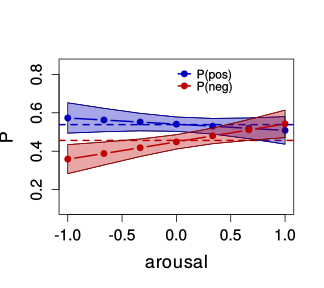

In [22]:
v <- (valence - 4)/3
a <- (arousal - 4)/3
vals <- (seq(1,7)-4)/3

linp <- glm(ispos~a, family="binomial")
linn <- glm(isneg~a, family="binomial")

predisp <- predict(linp, newdata=data.frame(a=vals), type="response", se.fit=TRUE)
predisn <- predict(linn, newdata=data.frame(a=vals), type="response", se.fit=TRUE)

plot(vals, predisp$fit, ylim=c(0.1,0.85), type="l", col="darkgreen", lwd=0.01,
     xlab=expression(arousal), ylab=expression(P), cex.axis=1.3, cex.lab=1.5)
abline(h=sum(ispos)/length(ispos), lwd=2, lty=2, col=rgb(0,0,0.75,1))
abline(h=sum(isneg)/length(isneg), lwd=2, lty=2, col=rgb(0.75,0,0,1))

polygon(c(vals,rev(vals)), c(predisp$fit-predisp$se, rev(predisp$fit+predisp$se)), col=rgb(0,0,0.75,0.35))
lines(vals, predisp$fit-predisp$se, col=rgb(0,0,0.75,1))
lines(vals, predisp$fit+predisp$se, col=rgb(0,0,0.75,1))
lines(vals, predisp$fit, col=rgb(0,0,0.75,1), type="b", lwd=2, pch=19)

polygon(c(vals,rev(vals)), c(predisn$fit-predisn$se, rev(predisn$fit+predisn$se)), col=rgb(0.75,0,0,0.35))
lines(vals, predisn$fit-predisn$se, col=rgb(0.75,0,0,1))
lines(vals, predisn$fit+predisn$se, col=rgb(0.75,0,0,1))
lines(vals, predisn$fit, col=rgb(0.75,0,0,1), type="b", lwd=2, pch=19)

legend(0,0.85,c("P(pos)", "P(neg)"), col=c(rgb(0,0,0.75,1), rgb(0.75,0,0,1)), pch=19, lwd=2, cex=1, box.lwd=-1, y.intersp = 2)

htmlreg(list(linp, linn), caption="Logistic regression for positive and negative expression depending on arousal (QDAP)", 
        digits=4, bold=0.05, custom.model.names=c("P(pos)", "P(neg)"))